## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [24]:
df.isnull().sum() # Sprawdzamy jakich danych nam brakuje

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [16]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

### Nie wszystkie dane sa kompletne. W rejsie "Titanica" bralo udzial 2200 osob a nasze dane zawieraja informacje tyko o 1310 pasazerach i czlonkach zalogi. 

In [11]:
male = df[df['sex'] == 'male'].count()['sex']
male

843

In [43]:
female = df[df['sex'] == 'female'].count()['sex']
female

466

### Widzimy powizej ze wiekszoscia gosci na pokladzie "Titanica" byli mezczyzni z liczba 843. Kiedy liczba kobiet na pokladzie wynosila 466.

In [55]:
df.groupby('pclass', as_index = False)[['name','body']].count()

,pclass,name,body
0,1.0,323,35
1,2.0,277,31
2,3.0,709,55


### Najwiecej osob ktore zakupilo bilety na resj statkiem, ktory na tamten okres byl nazywany "niezatapialnym", pochodzilo z najubozszej klasy. Az 709 osob z zanotowanych 1310 i tylko 55 cial z tej oto klasy odnaleziono.

In [59]:
df.groupby('survived', as_index = False)[['body', 'name']].count()

,survived,body,name
0,0.0,121,809
1,1.0,0,500


In [68]:
survived_values_count = df['survived'].value_counts()

total_values = len(df)

survived_percentage = round((survived_values_count / total_values) * 100)

df_survived_count = pd.DataFrame({
    'Survivors': survived_values_count,
    'Percentage': survived_percentage
})

df_survived_count

,Survivors,Percentage
0.0,809,62.0
1.0,500,38.0


### Lacznie odnalaziono 121 cial z 1310 zanotowanych osob na pokladzie. 

### Laczna liczba osob ktorym udalo sie przezyc katastrofe, wynosila 500 osob. Procentowo wynosi to 62% ososb ktorym sie nie udalo uratowac a 38% ktore przezyly katastrofe.

In [53]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.29,0.84,1.00,2.0,3.00,3.00,3.00
survived,1309.0,0.38,0.49,0.00,0.0,0.00,1.00,1.00
age,1046.0,29.88,14.41,0.17,21.0,28.00,39.00,80.00
sibsp,1309.0,0.50,1.04,0.00,0.0,0.00,1.00,8.00
parch,1309.0,0.39,0.87,0.00,0.0,0.00,0.00,9.00
fare,1308.0,33.30,51.76,0.00,7.9,14.45,31.28,512.33
body,121.0,160.81,97.70,1.00,72.0,155.00,256.00,328.00


## Najbardziej kosztowny bilet kroty zostal zakupiny na Titanica wynosil 512 dolarow. A srednia wartosc biletu wynosila 33 dolary.
# Wiek pasazerow i zalogi zaczynal sie od dzieci majacych zaledwie rok a osoby majace starsze ktorych wiek siegal 80-ciu lat.

### Teraz sporobojmy sobie zwizualizowac niektore dane ktore bylismy w stanie zgromadzic powyzej.

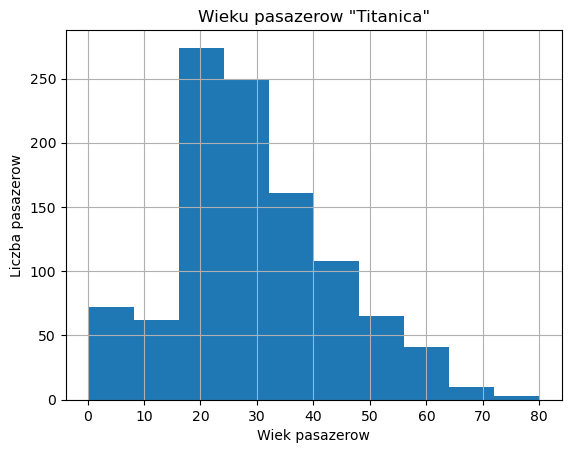

In [65]:
plt.hist(df['age'])
plt.xlabel('Wiek pasazerow')
plt.ylabel('Liczba pasazerow')
plt.title('Wieku pasazerow "Titanica"')
plt.grid()
plt.show() 

## To jest wizualizacja wieku osob na pokladzie Titanica.

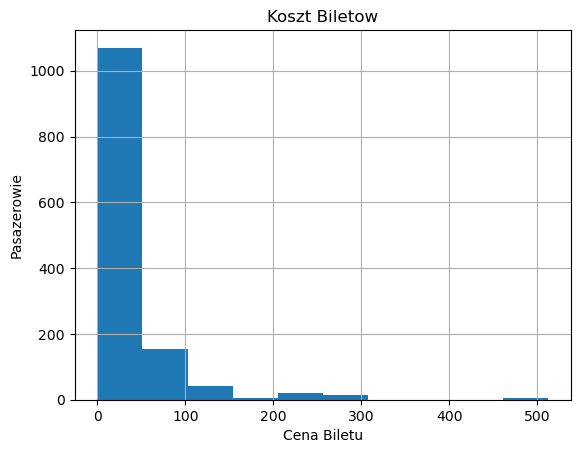

In [64]:
plt.hist(df['fare'])
plt.xlabel('Cena Biletu')
plt.ylabel('Pasazerowie')
plt.title('Koszt Biletow')
plt.grid()
plt.show() 

## Widzimu tutaj jaki koszt wyniosl, jaka ilosc osob ktore byly na polkadzie Titanica.

array([[<Axes: title={'center': 'pclass'}>]], dtype=object)

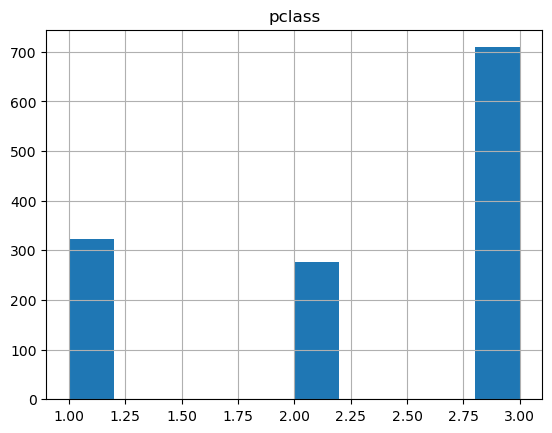

In [67]:
df.hist(column = 'pclass') # wizualizacja liczby osob w kazdej z klas 

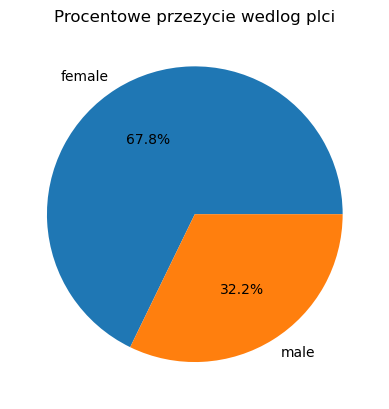

In [47]:
summary = df.groupby('sex')['survived'].sum()

# Tworzymy Pie Chart
summary.plot(kind='pie', legend=False, autopct='%1.1f%%')

# Etykiety 
plt.title('Procentowe przezycie wedlog plci')
plt.ylabel('') 
plt.show()

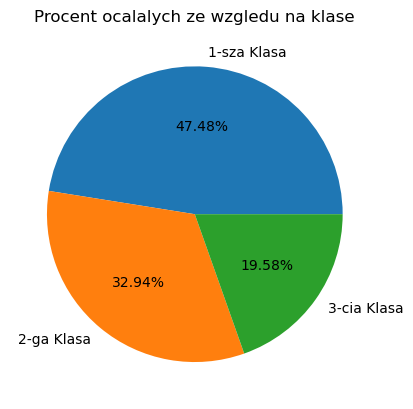

In [96]:
survivor_counts = df.groupby('pclass')['survived'].sum()

# suma osob dla kazdej z klas
total_counts = df['pclass'].value_counts()

# liczymy procent ocalalych dla kazdej z klas
survival_percentage = (survivor_counts / total_counts) * 100

survival_percentage_df = survival_percentage.reset_index()
survival_percentage_df.columns = ['pclass', 'Survival Percentage']

# MApujemy Pie chart i dodajemy Etykiety
survival_percentage_df.set_index('pclass')['Survival Percentage'].plot(kind='pie', labels = ['1-sza Klasa', '2-ga Klasa', '3-cia Klasa'], legend = False, autopct='%1.2f%%');

plt.title('Procent ocalalych ze wzgledu na klase')
plt.ylabel('')  
plt.show()

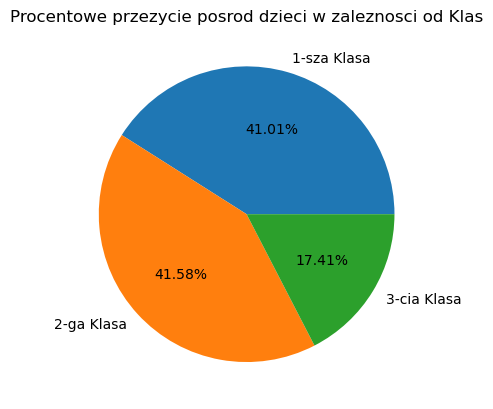

In [102]:
df['is_child'] = df['age'] < 18

# Definiujemy same dzieci 
children_df = df[df['is_child']]

# Oblicamy ile dzieci przezylo dla kazdej z klas
survivor_counts = children_df.groupby('pclass')['survived'].sum()

# Laczna ilosc dzieci dla kazdej z klas
total_counts = children_df['pclass'].value_counts()

# Obliczmy procentowe przezycie pozrod dzieci 
survival_percentage = (survivor_counts / total_counts) * 100

survival_percentage_df = survival_percentage.reset_index()
survival_percentage_df.columns = ['pclass', 'Survival Percentage']

# Mapujemy pie chart i dodajemy etykiety
survival_percentage_df.set_index('pclass')['Survival Percentage'].plot(kind='pie', labels = ['1-sza Klasa', '2-ga Klasa', '3-cia Klasa'], legend = False, autopct='%1.2f%%');

plt.title('Procentowe przezycie posrod dzieci w zaleznosci od Klas')
plt.ylabel('')  
plt.show()

### Zobaczmy ile bylo lodzi ratunkowych w trakcie rejsu Titanica 

In [8]:
df['boat'].count().sum() # Prwadzamy ile osob znalazlo droge do lodzi ratunkowych 

486

Tylko 486 osob trafilo do lodzi ratunkowych.

In [9]:
df['boat'].isna().sum() # Sprawdzamy ile osob nie udalo sie dotrzec do lodzi ratunkowych.

824

Az 824 osoby nie daly rady wsiasc do lodzi ratunkowych.

In [12]:
df['boat'].value_counts()

13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
9          25
11         25
16         23
8          23
7          23
D          20
6          20
12         19
2          13
A          11
B           9
1           5
5 7         2
C D         2
13 15       2
5 9         1
8 10        1
13 15 B     1
15 16       1
Name: boat, dtype: int64

Widzimy ze moglo uratowac sie duzo wiecej osob kiedy widzimy ze szalupa Nr 13 posiadala na pokladzie prawie 40 osob, gdzie az 15 z szalup byla prawie lub kompletnie pusta. 

In [33]:
puste_szalupy = 15       # Liczba prawie lub kompletnie pustych szalup na statku
pojemnosc_szalupy = 40  # Pojemność każdej szalupy biorac pod uwage szalupe Nr13

calkowita_pojemnosc = puste_szalupy * pojemnosc_szalupy

print(calkowita_pojemnosc)

600


Jesli do kazdej z, prawie lub tych kompletnie pustych lodzi ratunkowch udalo by sie wsadzic po 40 osob to udalo by sie uratowac dodatkowe 600 osob z pokadu Titanica. 

Zoabczmy jak by wygladala wtedy liczba osob ocalalych procentowo w porownaniu do aktualnych danych ktore udalo nam sie zgromadzic.

In [45]:
# Definiujemy nowe zmenne
nowi_ocalali = 1100 # nowa liczba ocalalych 
wszyscy_zanotowani = 1310 #calkowita liczba zarejestrowanych pasazerow

# obliczanie procentowe 
procent_ocalalych = (nowi_ocalali / wszyscy_zanotowani) * 100

print (procent_ocalalych)

83.96946564885496


Wiec jesli udalo by sie uratowac o 600 osob wiecej, liczba przezycia wzrosla by z 38% az do 84%.  

### Podsumowujac:

Jak widac najwiecej ocalalych pochodzilo z 1szej klasy a najmniej z klasy 3ciej. Udalo sie uratowac tylko 500 ososb z lacznej zanotowanej liczby pasazerow ktora wynosila 1310 osob. Z posrod wszystkich pasazerow ktorzy stracili zycie w katastrofie, udalo sie odnalezc tylko 121 cial. Procentowo przeylo tylko 38 procent pasazerow, tak zwanego "Niezatapialnego" okretu. Kiedy Titanic zaczal swoj rejs na pokadzie bylo wiecej mezczyzn niz kobiet ale, biorac pod uwage tylko osoby ktorym udalo sie przezyc katastrofe prawie 68 procent to kobiety a tylko 32 procent to mezczyzni. 

Wiek pasazerow byl dosc rozlegly zaczynajacy sie od pasazerow z 1 rokiem zycia az do osob siegajacych 80 lat. Sredni wiek pasazerow na pokladznie Titanica wynosil 30 lat.

Najdrozszy bilet na poklad Titanica wynisil 512 dolarow, aczkolwiek srednia cena biletu wynosila 33 dolary. 

Duza ilosc osob nie dotarlo do lodzi ratunkowych. Patrzac na wyniki, wisza iloscia osob ktore doatrly do szalup sa osoby z 1-wszej i 2-giej klasy. Aczkolwiek z 500 osob ktore ocalaly, do lodzi ratonkowych dotarlo 486 osob. Co oznacza ze wylowiono z lodowatej wody 14 osob. 

Podczas naszej analizy zauwazylismy ze duza czesc lodzi ratunkowych byla prawie lub kompletnie pusta (15). Jesli udalo by sie zapelnic te 15 lodzi ratunkowych 40-stoma pasazerami, udalo by sie uratowac 600 osob wiecej. Co oznaczalo by ze procent ocalalych wzrosl by z aktualniej liczby ktora wynosi 38 procent, az do 84 procent ocalalych. 
